In [1]:
import tweepy
from tweepy import OAuthHandler
import os
import datetime
import pandas as pd
from textblob import TextBlob
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import numpy as np
import re  
import spacy
import trnlp
import en_core_web_sm
nlp = en_core_web_sm.load()
import matplotlib.pyplot as plt; plt.rcdefaults()
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tunahan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tunahan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Defining the keys received by the twitter developer to use the "TWEEPY" API

In [2]:
API_KEY ="YOURKEY"
API_KEY_SECRET ="YOURKEY"
BEARER_TOKEN ="YOURKEY"
ACCESS_TOKEN ="YOURKEY"
ACCESS_TOKEN_SECRET ="YOURKEY"

Receiving tweets containing the given word on Twitter with tweepy API in the specified time interval

In [3]:
auth = tweepy.OAuthHandler(API_KEY, API_KEY_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth)

# search tweets
keywords = 'TEKNOFEST until:2022-09-03 since:2022-08-25 -filter:retweets'

tweets = tweepy.Cursor(api.search_tweets, q=keywords, count=100, tweet_mode="extended").items()

# create DataFrame
columns = ["Tweet Id",'User', 'Tweet']
data = []

for tweet in tweets:
    data.append([tweet.id,tweet.user.screen_name, tweet.full_text])

df = pd.DataFrame(data, columns=columns)

print(df)

                  Tweet Id             User  \
0      1565851184677765120  IronMan66056761   
1      1565850056502099968        eha_medya   
2      1565849074686992386         ulaknews   
3      1565848919787061253         meg_1776   
4      1565845486078251009          EErtnaz   
...                    ...              ...   
11516  1563481172818395137         adyu2006   
11517  1563480835189514240     Semanurrr333   
11518  1563480132811370496        gokboruht   
11519  1563479667906031616            Sabah   
11520  1563477768272506882       ErhanERDIN   

                                                   Tweet  
0      @eha_medya Şimdi teknofest ve Selçuk damat yan...  
1      Cumhurbaşkanı Erdoğan:\n\n▪️Millî teknoloji ha...  
2      Dünya Bülteni: TEKNOFEST'te yeni hedef Endonez...  
3      Bu tarz isimlerlede türkçü/milliyetçi gençlere...  
4      @kubrapc siyasete girmeyi düşünüyor musunuz di...  
...                                                  ...  
11516  Teknofest 2022 

In [4]:
df.head()

,Tweet Id,User,Tweet
0,1565851184677765120,IronMan66056761,@eha_medya Şimdi teknofest ve Selçuk damat yan...
1,1565850056502099968,eha_medya,Cumhurbaşkanı Erdoğan:\n\n▪️Millî teknoloji ha...
2,1565849074686992386,ulaknews,Dünya Bülteni: TEKNOFEST'te yeni hedef Endonez...
3,1565848919787061253,meg_1776,Bu tarz isimlerlede türkçü/milliyetçi gençlere...
4,1565845486078251009,EErtnaz,@kubrapc siyasete girmeyi düşünüyor musunuz di...


In [5]:
df.tail()

,Tweet Id,User,Tweet
11516,1563481172818395137,adyu2006,Teknofest 2022 kapsamında Türkiye Açık Kaynak ...
11517,1563480835189514240,Semanurrr333,@hhnux @Gs_Yakup1 @erkaneperen1903 Ülkeyi yöne...
11518,1563480132811370496,gokboruht,@teknofest Milli teknoloji sevgisini ilmek ilm...
11519,1563479667906031616,Sabah,"Türkiye'nin teknoloji ateşi, milli mücadelenin..."
11520,1563477768272506882,ErhanERDIN,👍 https://t.co/vBLhrpjK0q


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11521 entries, 0 to 11520
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet Id  11521 non-null  int64 
 1   User      11521 non-null  object
 2   Tweet     11521 non-null  object
dtypes: int64(1), object(2)
memory usage: 270.1+ KB


To clean the expressions in the text from nonsense characters so that the NLP process can be done properly

In [7]:
df["Tweet"] = df["Tweet"].str.lower() 

In [8]:
df["Tweet"] = df["Tweet"].str.replace('[@#&$%+-/*]',"") 

<ipython-input-8-ae85aac36424>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Tweet"] = df["Tweet"].str.replace('[@#&$%+-/*]',"") #tweet is cleaning


In [9]:
df["Tweet"].str.strip()

0        eha_medya şimdi teknofest ve selçuk damat yandı😆😆
1        cumhurbaşkanı erdoğan:\n\n▪️millî teknoloji ha...
2        dünya bülteni: teknofest'te yeni hedef endonez...
3        bu tarz isimlerlede türkçümilliyetçi gençlere ...
4        kubrapc siyasete girmeyi düşünüyor musunuz diy...
                               ...                        
11516    teknofest 2022 kapsamında türkiye açık kaynak ...
11517    hhnux gs_yakup1 erkaneperen1903 ülkeyi yöneten...
11518    teknofest milli teknoloji sevgisini ilmek ilme...
11519    türkiye'nin teknoloji ateşi milli mücadelenin ...
11520                                👍 https:tcovblhrpjk0q
Name: Tweet, Length: 11521, dtype: object

In [10]:
import demoji #to delete emojis

In [11]:
df = df.applymap(lambda x: demoji.replace(str(x),''))  

In [12]:
df.head()

,Tweet Id,User,Tweet
0,1565851184677765120,IronMan66056761,eha_medya şimdi teknofest ve selçuk damat yandı
1,1565850056502099968,eha_medya,cumhurbaşkanı erdoğan:\n\nmillî teknoloji haml...
2,1565849074686992386,ulaknews,dünya bülteni: teknofest'te yeni hedef endonez...
3,1565848919787061253,meg_1776,bu tarz isimlerlede türkçümilliyetçi gençlere ...
4,1565845486078251009,EErtnaz,kubrapc siyasete girmeyi düşünüyor musunuz diy...


In [13]:
df['Tweet'] = df['Tweet'].str.replace('http\S+|www.\S+', '', case=False) #https extensions deleted

<ipython-input-13-b84fa17cb392>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Tweet'] = df['Tweet'].str.replace('http\S+|www.\S+', '', case=False) #https uzantıları silidndi


In [14]:
df.tail()

,Tweet Id,User,Tweet
11516,1563481172818395137,adyu2006,teknofest 2022 kapsamında türkiye açık kaynak ...
11517,1563480835189514240,Semanurrr333,hhnux gs_yakup1 erkaneperen1903 ülkeyi yöneten...
11518,1563480132811370496,gokboruht,teknofest milli teknoloji sevgisini ilmek ilme...
11519,1563479667906031616,Sabah,türkiye'nin teknoloji ateşi milli mücadelenin ...
11520,1563477768272506882,ErhanERDIN,


In [15]:
dft = df.copy()

In [16]:
#df.to_csv("Teknofest.csv", encoding='utf-8',index=False)

In [17]:
#b = pd.read_csv("Teknofest.csv")

In [19]:
#Splitting all words and adding them to the list
all_sentences = []

for word in df["Tweet"]:
    all_sentences.append(word)

all_sentences

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)

print(lines)

['eha_medya', 'şimdi', 'teknofest', 've', 'selçuk', 'damat', 'yandı', 'cumhurbaşkanı', 'erdoğan:', 'millî', 'teknoloji', 'hamlemizin', 'lokomotifi', 'yeni', 'ufuklara', 'açılmanın', 'geleceği', 'tasarlamanın', 'en', 'yeni', 'teknolojilerin', 'festivali', 'yarın', 'ben', 'de', 'gençlerimizle', 'birlikte', 'teknofest', 'samsun’da', 'olacağım…', 'dünya', 'bülteni:', "teknofest'te", 'yeni', 'hedef', 'endonezya', 've', 'pakistan', 'sondakika', 'haber', 'sondakikahaber', 'haberler', 'bu', 'tarz', 'isimlerlede', 'türkçümilliyetçi', 'gençlere', 'mastürbasyon', 'yapıyorlar', 'e', 'tabikide', 'bu', 'enayiler', 'yutuyor', 'kubrapc', 'siyasete', 'girmeyi', 'düşünüyor', 'musunuz', 'diye', 'sormayı', 'unutmuş', 'bu', 'iş', 'adamı', 'iktidar', 'giderse', 'işlerinin', 'bozulacağını', 'söyledi', "kılıçdaroğlu'nun", 'teknofest', 'ziyaretini', 'samimiyetsiz', 'buldu', 'siyasetin', 'ta', 'içinde', 'zaten', 'daha', 'ne', 'kadar', 'girecek?', 'teknofest', 'cumhurbaşkanı', 'erdoğan:', 'yarın', 'ben', 'de', '

In [20]:
#This is stemming the words to their root
from TurkishStemmer import TurkishStemmer
s_stemmer = TurkishStemmer()

In [21]:
stem = []
for word in lines:
    stem.append(s_stemmer.stem(word))
    
stem

['eha_medya',
 'şimt',
 'teknofest',
 've',
 'selçuk',
 'damat',
 'yant',
 'cumhurbaşkan',
 'erdoğan:',
 'millî',
 'teknoloji',
 'hamle',
 'lokomotif',
 'yen',
 'ufuk',
 'açılma',
 'gelecek',
 'tasarlama',
 'en',
 'yen',
 'teknoloji',
 'festivali',
 'yar',
 'ben',
 'de',
 'genç',
 'birlik',
 'teknofest',
 'samsun’da',
 'olacağım…',
 'dünya',
 'bülteni:',
 "teknofest'te",
 'yen',
 'hedef',
 'endonezya',
 've',
 'pakistan',
 'sondakika',
 'haber',
 'sondakikahaber',
 'haber',
 'bu',
 'tarz',
 'isimlerle',
 'türkçümilliyetç',
 'genç',
 'mastürbasyon',
 'yapıyor',
 'e',
 'tabiki',
 'bu',
 'enayi',
 'yutuyor',
 'kubrapc',
 'siyase',
 'girme',
 'düşünüyor',
 'mus',
 'di',
 'sorma',
 'unut',
 'bu',
 'iş',
 'adam',
 'iktidar',
 'gider',
 'işler',
 'bozulacak',
 'söyl',
 "kılıçdaroğlu'nun",
 'teknofest',
 'ziyaret',
 'samimiyets',
 'bult',
 'siyase',
 'ta',
 'iç',
 'zaten',
 'dah',
 'ne',
 'kadar',
 'girecek?',
 'teknofest',
 'cumhurbaşkan',
 'erdoğan:',
 'yar',
 'ben',
 'de',
 'genç',
 'birlik

In [22]:
stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['eha_medya',
 'şimt',
 'teknofest',
 've',
 'selçuk',
 'damat',
 'yant',
 'cumhurbaşkan',
 'erdoğan:',
 'millî',
 'teknoloji',
 'hamle',
 'lokomotif',
 'yen',
 'ufuk',
 'açılma',
 'gelecek',
 'tasarlama',
 'en',
 'yen',
 'teknoloji',
 'festivali',
 'yar',
 'ben',
 'de',
 'genç',
 'birlik',
 'teknofest',
 'samsun’da',
 'olacağım…',
 'dünya',
 'bülteni:',
 "teknofest'te",
 'yen',
 'hedef',
 'endonezya',
 've',
 'pakistan',
 'sondakika',
 'haber',
 'sondakikahaber',
 'haber',
 'bu',
 'tarz',
 'isimlerle',
 'türkçümilliyetç',
 'genç',
 'mastürbasyon',
 'yapıyor',
 'e',
 'tabiki',
 'bu',
 'enayi',
 'yutuyor',
 'kubrapc',
 'siyase',
 'girme',
 'düşünüyor',
 'mus',
 'di',
 'sorma',
 'unut',
 'bu',
 'iş',
 'adam',
 'iktidar',
 'gider',
 'işler',
 'bozulacak',
 'söyl',
 "kılıçdaroğlu'nun",
 'teknofest',
 'ziyaret',
 'samimiyets',
 'bult',
 'siyase',
 'ta',
 'iç',
 'zaten',
 'dah',
 'ne',
 'kadar',
 'girecek?',
 'teknofest',
 'cumhurbaşkan',
 'erdoğan:',
 'yar',
 'ben',
 'de',
 'genç',
 'birlik

In [24]:
df["Tweet"] = pd.DataFrame(stem2)
#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [25]:
stem2

['eha_medya',
 'şimt',
 'teknofest',
 've',
 'selçuk',
 'damat',
 'yant',
 'cumhurbaşkan',
 'erdoğan:',
 'millî',
 'teknoloji',
 'hamle',
 'lokomotif',
 'yen',
 'ufuk',
 'açılma',
 'gelecek',
 'tasarlama',
 'en',
 'yen',
 'teknoloji',
 'festivali',
 'yar',
 'ben',
 'de',
 'genç',
 'birlik',
 'teknofest',
 'samsun’da',
 'olacağım…',
 'dünya',
 'bülteni:',
 "teknofest'te",
 'yen',
 'hedef',
 'endonezya',
 've',
 'pakistan',
 'sondakika',
 'haber',
 'sondakikahaber',
 'haber',
 'bu',
 'tarz',
 'isimlerle',
 'türkçümilliyetç',
 'genç',
 'mastürbasyon',
 'yapıyor',
 'e',
 'tabiki',
 'bu',
 'enayi',
 'yutuyor',
 'kubrapc',
 'siyase',
 'girme',
 'düşünüyor',
 'mus',
 'di',
 'sorma',
 'unut',
 'bu',
 'iş',
 'adam',
 'iktidar',
 'gider',
 'işler',
 'bozulacak',
 'söyl',
 "kılıçdaroğlu'nun",
 'teknofest',
 'ziyaret',
 'samimiyets',
 'bult',
 'siyase',
 'ta',
 'iç',
 'zaten',
 'dah',
 'ne',
 'kadar',
 'girecek?',
 'teknofest',
 'cumhurbaşkan',
 'erdoğan:',
 'yar',
 'ben',
 'de',
 'genç',
 'birlik

Number of repeating words in all tweets

In [26]:
df["Tweet"].value_counts()

teknofest              772
ve                     186
bir                    133
genç                    93
de                      93
                      ... 
oku                      1
dağıtma                  1
tedgelecegehazirlar      1
"evlatlarımızı           1
güney                    1
Name: Tweet, Length: 3635, dtype: int64

In [27]:
from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df["Tweet"]:
    freqdoctor[words] += 1

freqdoctor

FreqDist({'teknofest': 772, 've': 186, 'bir': 133, 'de': 93, 'genç': 93, 'başkan': 84, 'teknoloji': 80, 'bu': 78, 'teknofestkaradeni̇z': 66, 'iç': 62, ...})


Words used in 20 tweets in order from start to finish

D:\anaconda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


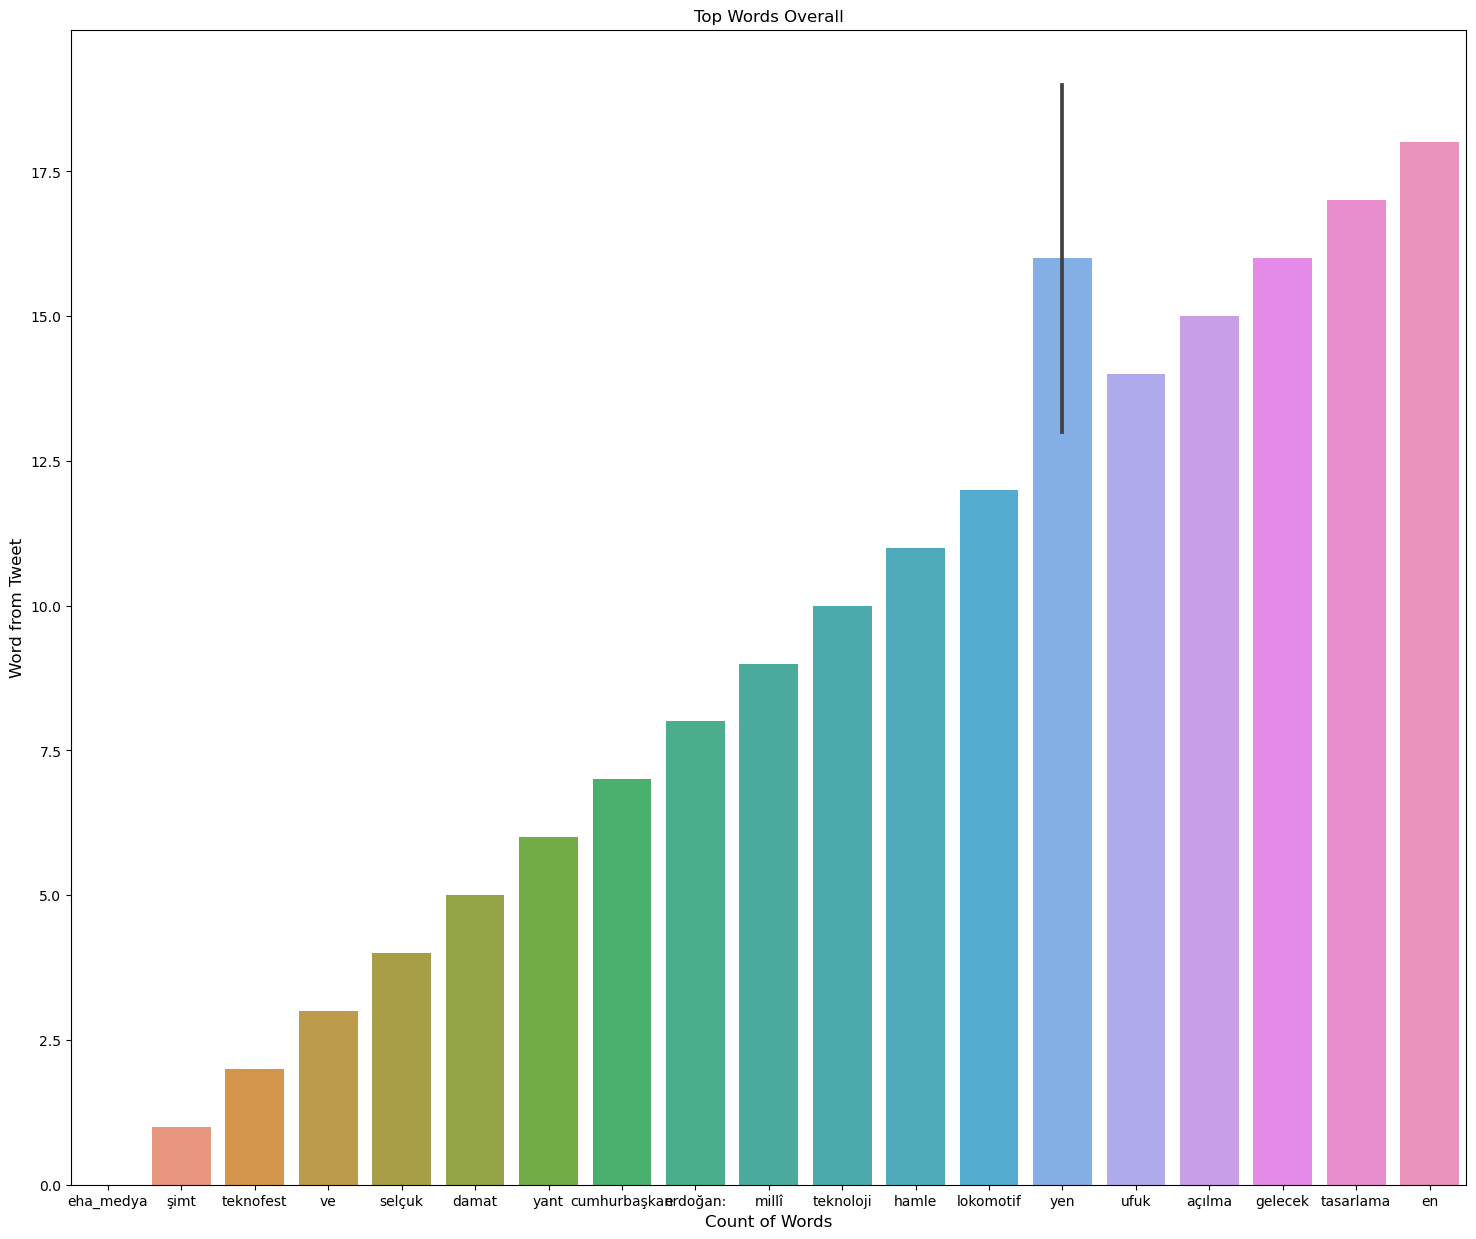

In [28]:
a=df.Tweet[:20]
plt.figure(figsize=(18,15))
sns.barplot(a.values, a.index, alpha=1)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()

Labeling the created DataFrame

In [29]:
from spacy import displacy
from collections import Counter

In [30]:
def show_ents(doc):
    if doc.ents:
        for ent in doc.ents:
            print(ent.text + ' - ' + ent.label_ + ' - ' + str(spacy.explain(ent.label_)))

In [31]:
nlp.max_length = 2000000

In [34]:
str1 = " " 
stem2 = str1.join(lines)

stem2 = nlp(stem2)

label = [(X.text, X.label_) for X in stem2.ents]

df10 = pd.DataFrame(label, columns = ['Word','Entity'])

df10 = df10.where(df10['Entity'] == 'PERSON')

df11 = df10['Word'].value_counts()

The 20 most used words in tweets

D:\anaconda python\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


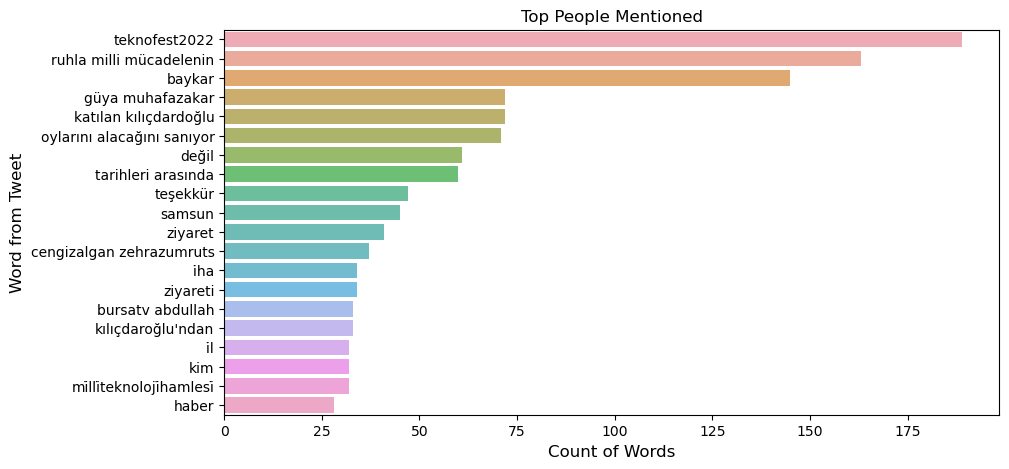

In [35]:
df = df11[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top People Mentioned')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()